In [169]:
import scipy
import scipy.io as sio
import glob
import numpy as np
from PIL import Image
import pandas as pd

def image_process(img_path):
    img_list = glob.glob(img_path)
    img_list.sort()
    img_name = [img.split('/')[-1] for img in img_list]
    images = [np.array((Image.open(img)).resize((64,64))) for img in img_list]
    images = np.array(images)/255
    x_data = np.array(images)
    print(x_data.shape)
    return x_data, img_name

# Load model

In [214]:
from build_models import *
from vae import *

builder = BuildModel((64,64,3), 1000, n_layers=3, dense_dim=1024)
encoder = builder.build_encoder()
decoder = builder.build_decoder()

model = VAE(encoder, decoder, (64,64,3))
model.compile()

model.load_weight('results/celeba_z1000/vae.h5')

# Get exp imgs latent

In [215]:
fimg, fname = image_process('data/fmri_img/female/0*jpg')
mimg, mname = image_process('data/fmri_img/male/0*jpg')

(768, 64, 64, 3)
(706, 64, 64, 3)


In [216]:
flat = model.encoder.predict(fimg)[2]
mlat = model.encoder.predict(mimg)[2]
flat.shape , mlat.shape

((768, 1000), (706, 1000))

In [208]:
def get_lat_format(name, lat, dim):
    lat_format = []
    for n, l in zip(name, lat):
        l = np.reshape(l, (1,dim))
        lat_format.append([n, l])
    lat_format = np.array(lat_format)
    
    return lat_format

In [220]:
f_lat_new = get_lat_format(fname, flat, 1000)g 
m_lat_new = get_lat_format(mname, mlat, 1000)
f_lat_new.shape, m_lat_new.shape, f_lat_new[0][1].shape

((768, 2), (706, 2), (1, 1000))

In [227]:
rec_imgs = model.decoder.predict(mlat)

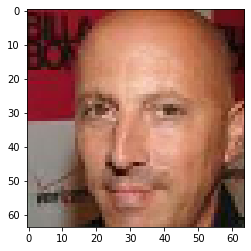

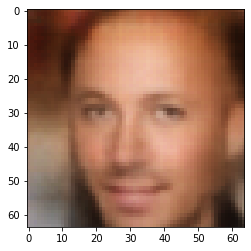

In [233]:
plt.imshow(mimg[6])
plt.show()
plt.imshow(rec_imgs[6])

# act2lat

In [154]:
BPLUS = '/Volumes/BPlus/primeRec/'
recon_path = '/Volumes/BPlus/primeRec/recon/primeRecon_02/'
csv = pd.read_csv(recon_path+'imgList_cocat_test.csv')

In [159]:
reg_lat = recon_path + 'xRecon_avrg_linear_mask1.mat'
reg_lat = sio.loadmat(reg_lat)['xRecon_avrg']
reg_info = []
for i in range(19, 19+20):
    info = csv.loc[i][0]
    name, gender = info.split('/')[-1], info.split('/')[-2]
    reg_info.append([gender, name])
reg_info = np.array(reg_info)
reg_lat.shape, reg_info.shape

((20, 100), (20, 2))

In [163]:
org_imgs=[]
for gender, name in reg_info:
    print(gender, name)
    org_img, _ = image_process('%s/vae_train/data/%s/%s'%(BPLUS, gender, name))
    org_imgs.extend(org_img)
    
org_imgs=np.array(org_imgs)
org_imgs.shape

female 000024.jpg
(1, 64, 64, 3)
female 001007.jpg
(1, 64, 64, 3)
female 001360.jpg
(1, 64, 64, 3)
female 001718.jpg
(1, 64, 64, 3)
female 001733.jpg
(1, 64, 64, 3)
male 001826.jpg
(1, 64, 64, 3)
male 002519.jpg
(1, 64, 64, 3)
male 003687.jpg
(1, 64, 64, 3)
male 005403.jpg
(1, 64, 64, 3)
male 005849.jpg
(1, 64, 64, 3)
female 000099.jpg
(1, 64, 64, 3)
female 000741.jpg
(1, 64, 64, 3)
female 001771.jpg
(1, 64, 64, 3)
female 001903.jpg
(1, 64, 64, 3)
female 003336.jpg
(1, 64, 64, 3)
male 002213.jpg
(1, 64, 64, 3)
male 002724.jpg
(1, 64, 64, 3)
male 006853.jpg
(1, 64, 64, 3)
male 007061.jpg
(1, 64, 64, 3)
male 027301.jpg
(1, 64, 64, 3)


(20, 64, 64, 3)

In [165]:
rec_imgs = model.vae.predict(org_imgs)
rec_imgs.shape

(20, 64, 64, 3)

In [167]:
rec_lat = model.decoder.predict(reg_lat)
rec_lat.shape

(20, 64, 64, 3)

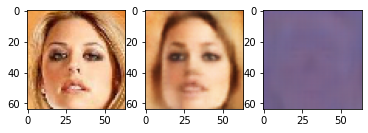

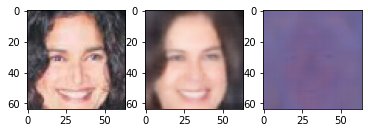

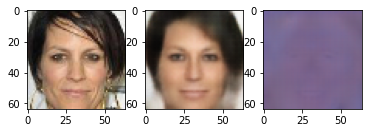

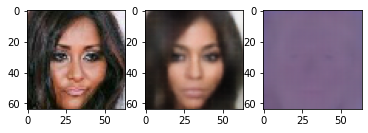

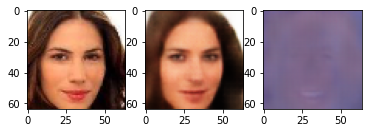

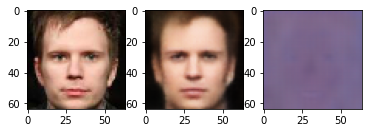

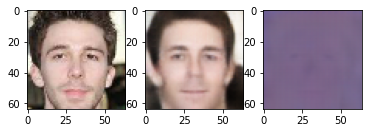

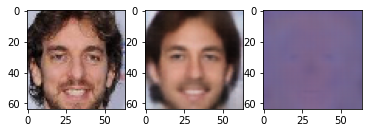

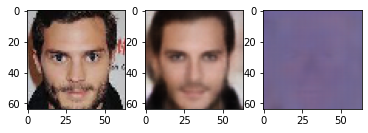

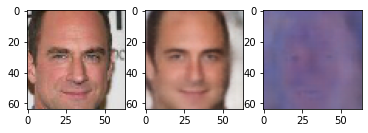

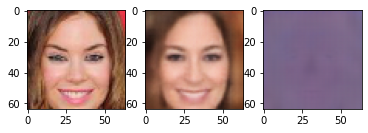

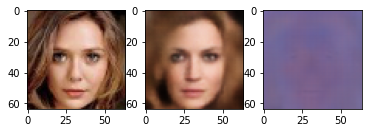

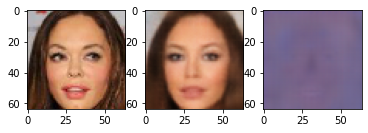

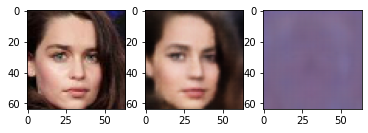

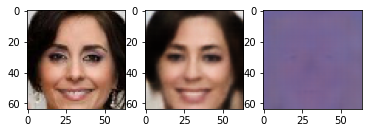

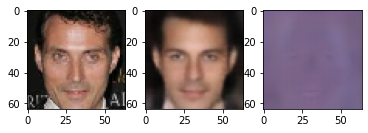

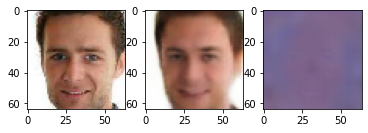

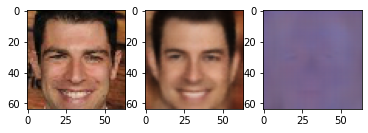

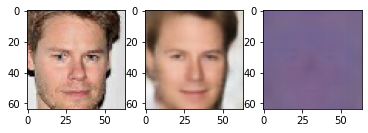

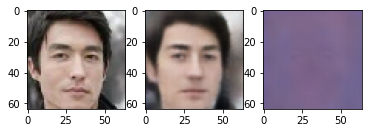

In [168]:
for org, rec, lat in zip(org_imgs, rec_imgs, rec_lat):
    
    plt.subplot(1,3,1)
    plt.imshow(org)
    plt.subplot(1,3,2)
    plt.imshow(rec)
    plt.subplot(1,3,3)
    plt.imshow(lat)
    plt.show()